## Description of Notebook

The notebook is used to look closer into VDFs and the fields files in order to identify the stable and unstable periods. This notebook is also used to prepare the data for the machine learning (yet without the partitioning of the data into the train and test data sets which will be done separately)

**IMPORTANT NOTE:** this notebook acts synchronously with the notebook used to generate the VDF moments data set. Therefore, in case of any changes to the labeling strategy or simulations considered, both notebooks have to be run one-by-one. The labeling information needs to be copied to VDF folders as well.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import kineticsim_reader as kr
import pickle
import os
import random
from scipy.signal import savgol_filter
from tqdm import tqdm

In [5]:
simfiles = ['particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
    'particles.d11_A0.75Hepp_beta1_256',\
    'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
    'particles.d11_E11Ap4.3Aa1.6',\
    'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
    'particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
    'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
    'particles.d11_He++A10_256_iden0eps0',\
    'particles.d11_He++v2_256_iden0eps1e-4t600',\
    'particles.d11_He++vd1.5_256_iden0eps1e-4',\
    'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
    'particles.d11_pv1Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
    'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
    'particles.d11_pv2Ap1Ab1betac0.429betab0.858_128_128x2_dx0.75_t3000',\
    'particles.d11_pv2Ap1Ab2betac0.429betab0.858_128_128x2_dx0.75_t3000',\
    'particles.d11_pv2Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
    'particles.d11_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
    'particles.d11_pv2av2Ap1Aa1beta0.429_128_128x2_dx0.75_t3000',\
    'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
    'particles.d11_vap1.2Ap1Aa0.75_rdna_0.05',\
    'particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007',\
    'particles.d11_vap1.5Ap1.5Aa1rdna_0.007']

fldfiles = ['fields.d10_A0.5Hepp_beta0.5eps1e-4_256',\
    'fields.d10_A0.75Hepp_beta1_256',\
    'fields.d10_E11Ap3.3Aa2.0Vd0.42',\
    'fields.d10_E11Ap4.3Aa1.6',\
    'fields.d10_E11Ap4.3Aa1.6Vd0.32',\
    'fields.d10_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
    'fields.d10_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
    'fields.d10_He++A10_256_iden0eps0',\
    'fields.d10_He++v2_256_iden0eps1e-4t600',\
    'fields.d10_He++vd1.5_256_iden0eps1e-4',\
    'fields.d10_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
    'fields.d10_pv1Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
    'fields.d10_pv2a_128x3_iden0eps1e-4_dx0.75',\
    'fields.d10_pv2Ap1Ab1betac0.429betab0.858_128_128x2_dx0.75_t3000',\
    'fields.d10_pv2Ap1Ab2betac0.429betab0.858_128_128x2_dx0.75_t3000',\
    'fields.d10_pv2Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
    'fields.d10_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
    'fields.d10_pv2av2Ap1Aa1beta0.429_128_128x2_dx0.75_t3000',\
    'fields.d10_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
    'fields.d10_vap1.2Ap1Aa0.75_rdna_0.05',\
    'fields.d10_vap1.2Ap3.35Aa2.05rdna_0.007',\
    'fields.d10_vap1.5Ap1.5Aa1rdna_0.007']

populations = [[0.9,0.05], [0.9,0.05], [0.986,0.007], [0.986,0.007], [0.986,0.007],\
               [0.986,0.007], [0.986,0.007], [0.9,0.05], [0.9,0.05], [0.9,0.05], [1.00,0.00],\
               [1.00,0.00], [0.91,0.045], [1.00,0.00], [1.00,0.00], [1.00,0.00], [0.91,0.045],\
               [0.91,0.045], [0.91,0.045], [0.9,0.05], [0.986,0.007], [0.986,0.007]]

## Generation of a VDF converter

Size specification: 40x40

Range specification: -2.5$V_A$:3.5$V_A$ for x direction, -3.0$V_A$:3.0$V_A$ for y direction

### Simple visualization to understand rebinning (orientation and correctness)

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.5Hepp_beta0.5eps1e-4_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


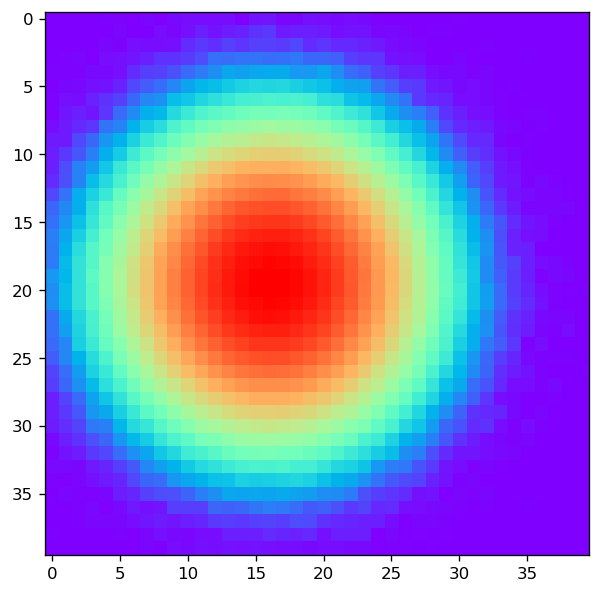

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.75Hepp_beta1_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


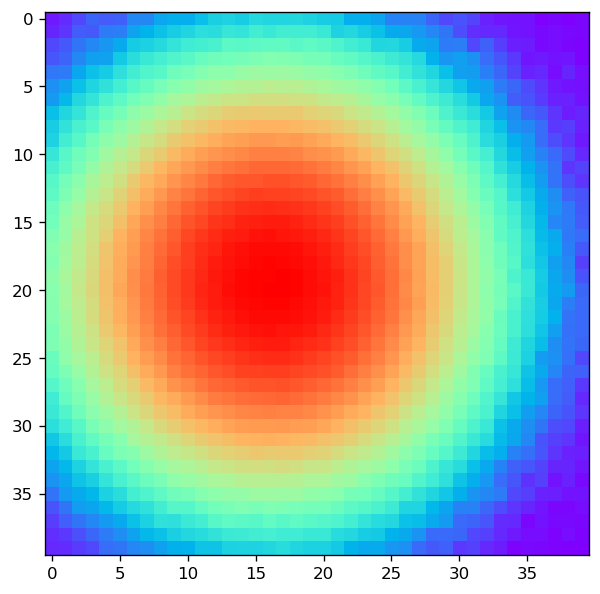

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap3.3Aa2.0Vd0.42
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


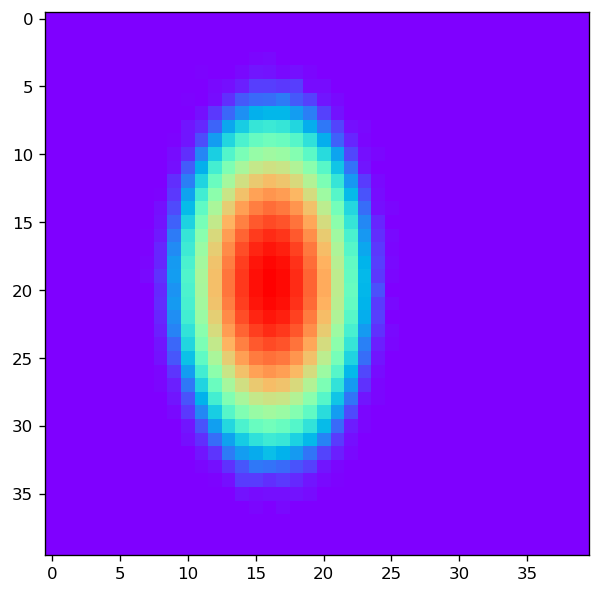

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


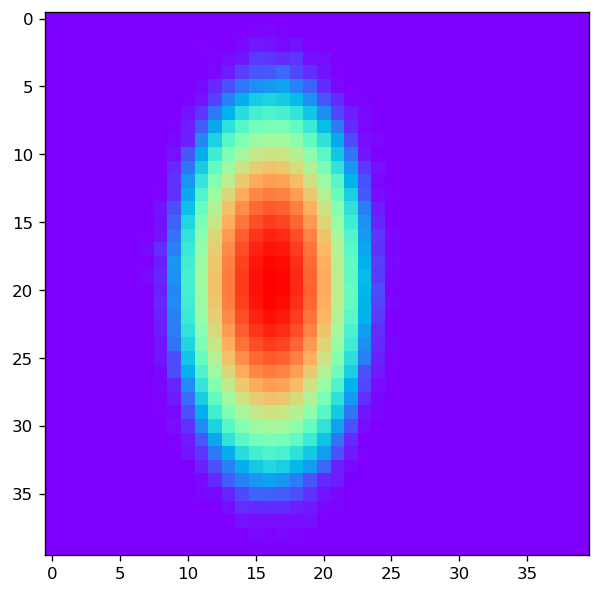

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6Vd0.32
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


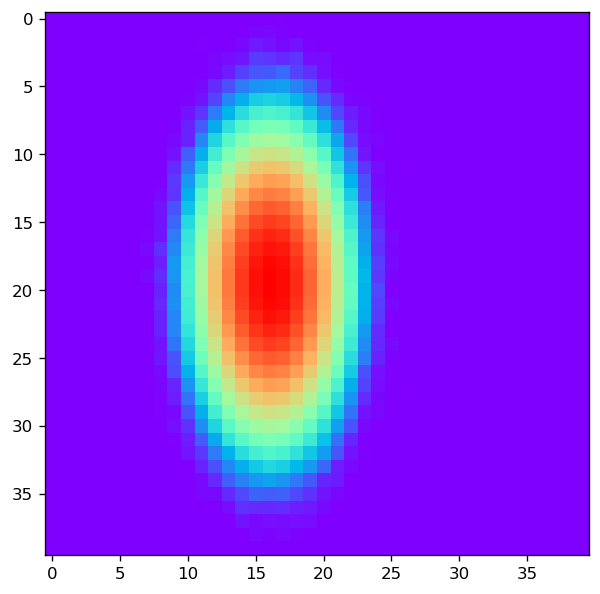

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


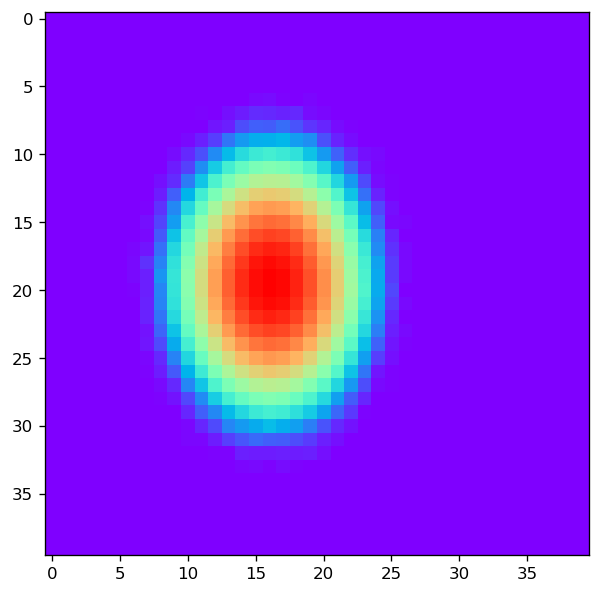

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


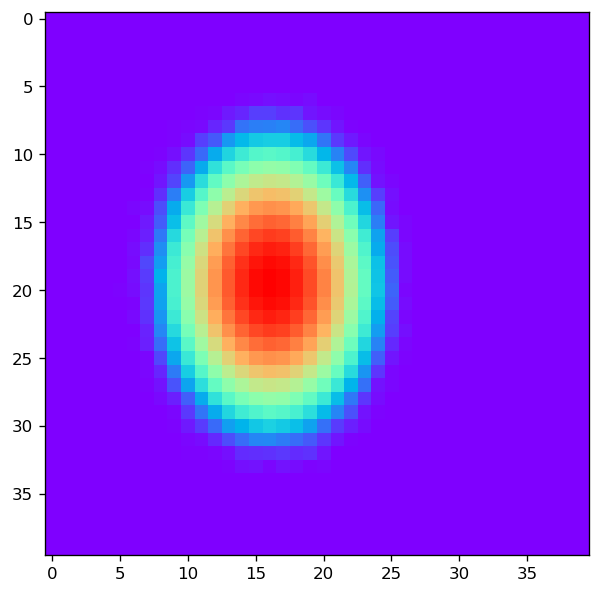

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++A10_256_iden0eps0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


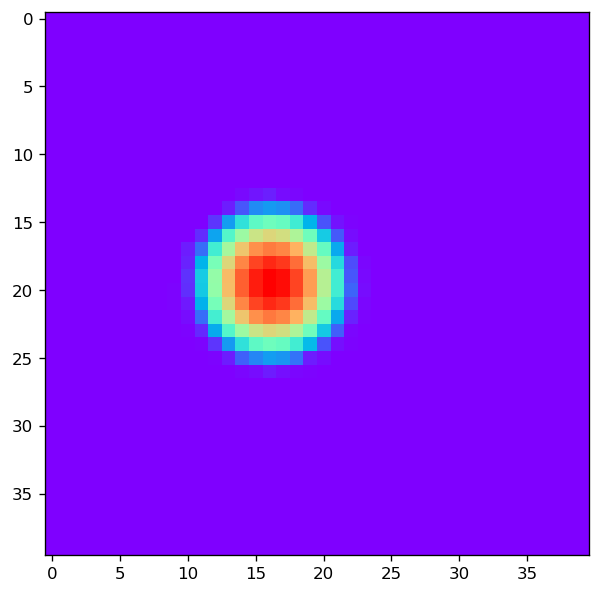

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++v2_256_iden0eps1e-4t600
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


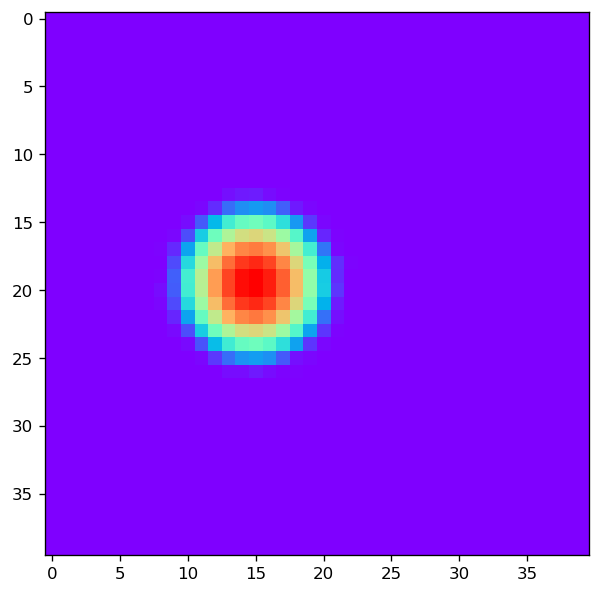

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++vd1.5_256_iden0eps1e-4
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


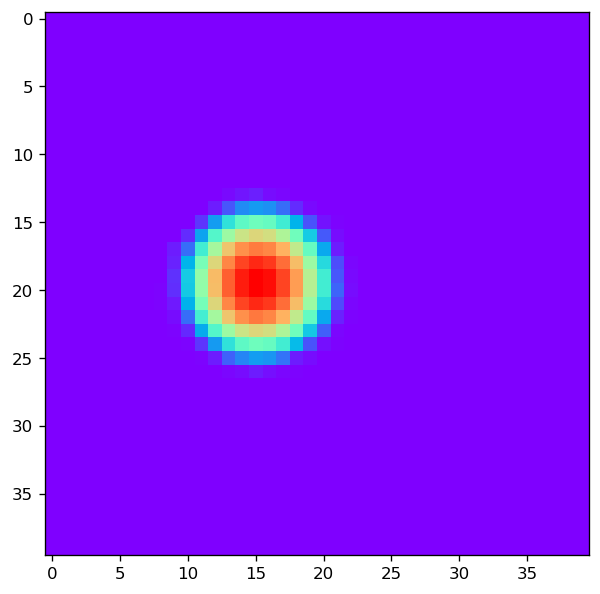

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


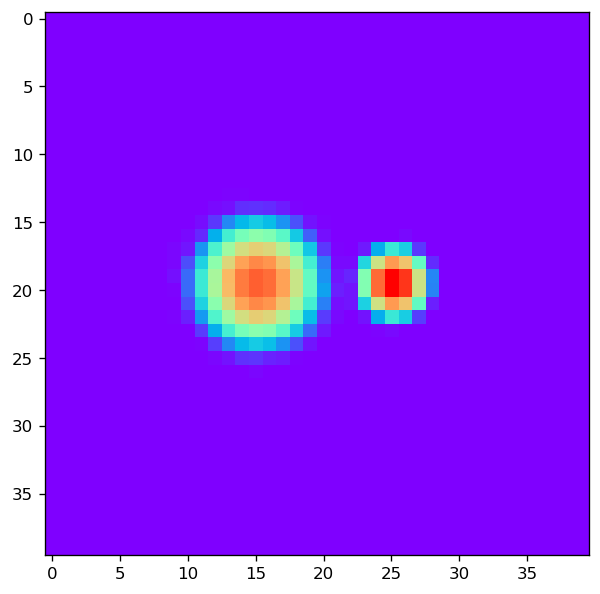

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv1Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


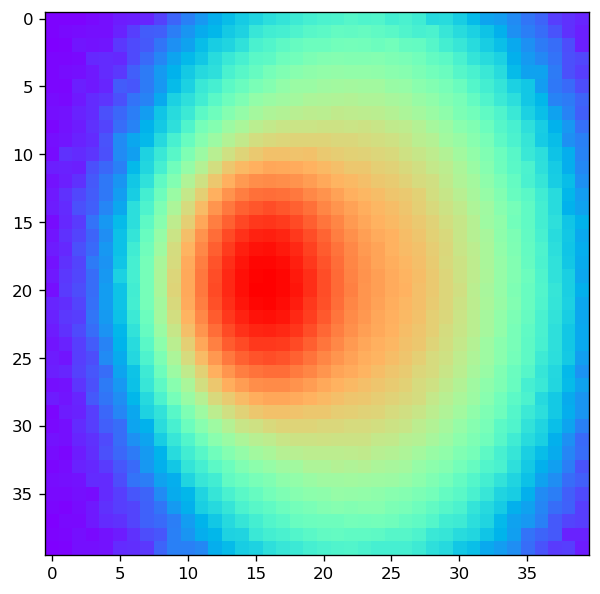

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


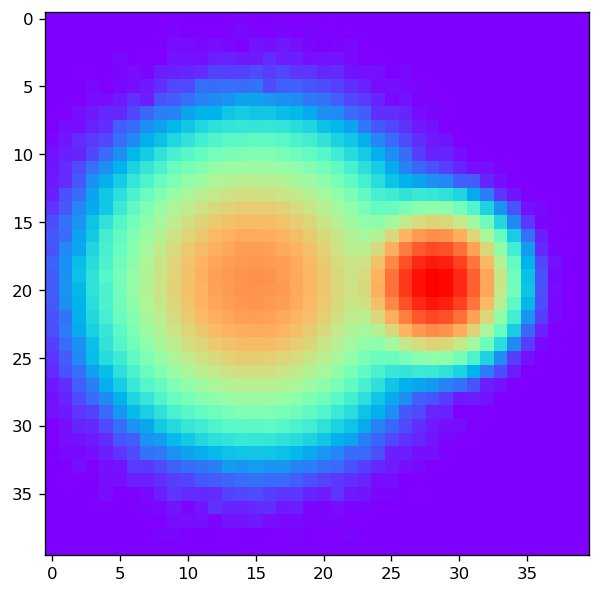

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2Ap1Ab1betac0.429betab0.858_128_128x2_dx0.75_t3000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


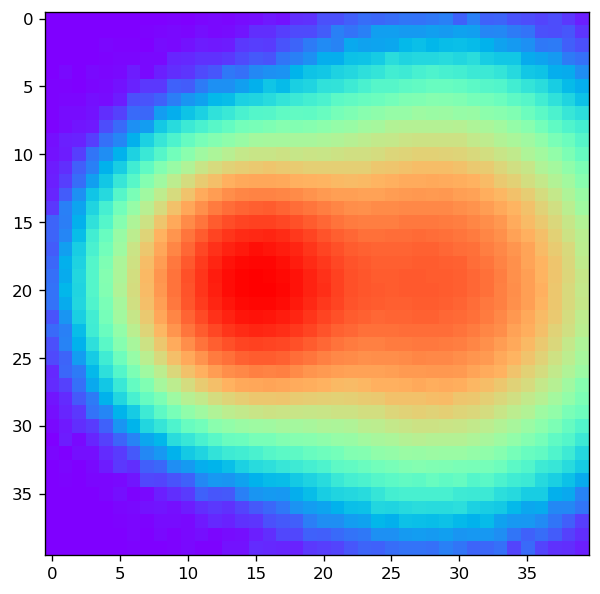

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2Ap1Ab2betac0.429betab0.858_128_128x2_dx0.75_t3000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


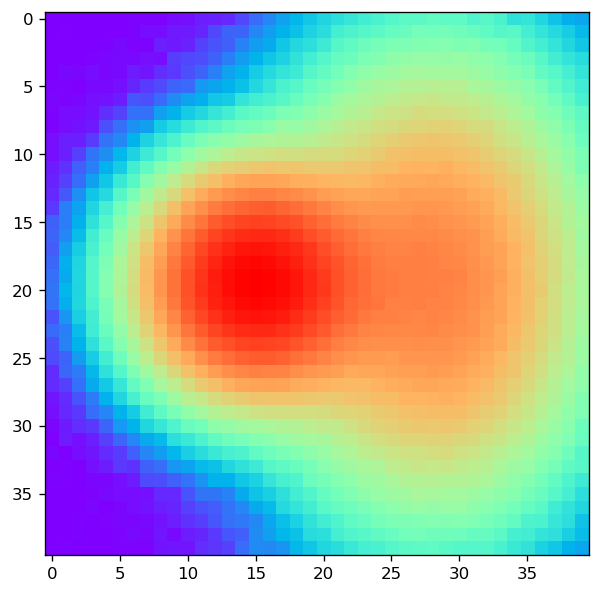

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


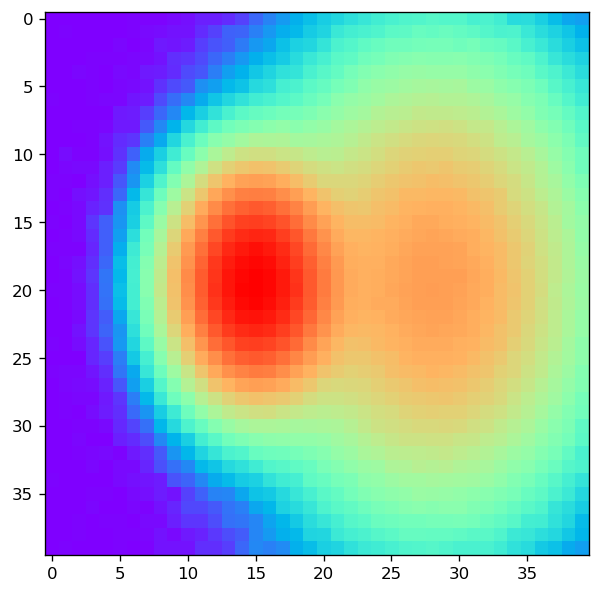

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2av2.3_128x3_iden0eps1e-4_dx0.75
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


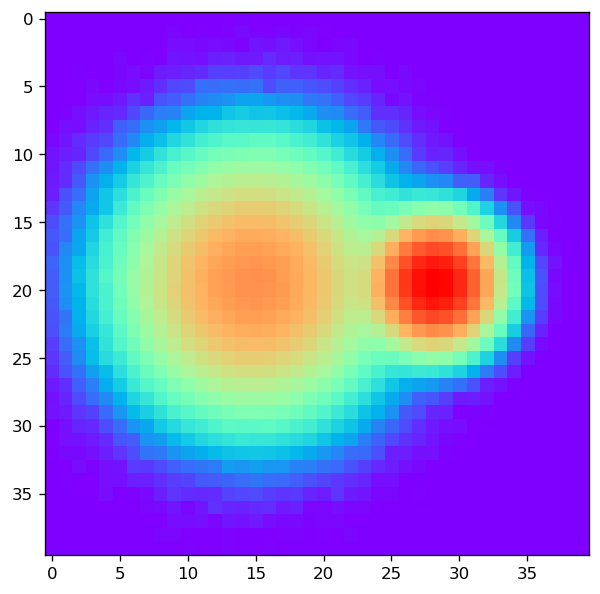

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2av2Ap1Aa1beta0.429_128_128x2_dx0.75_t3000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


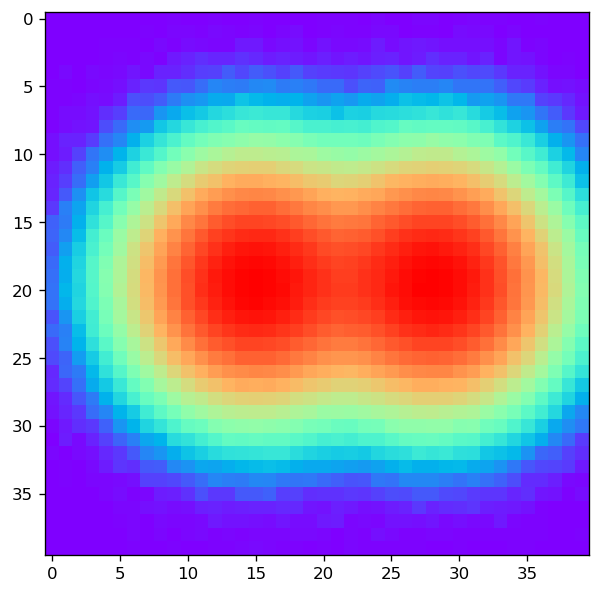

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


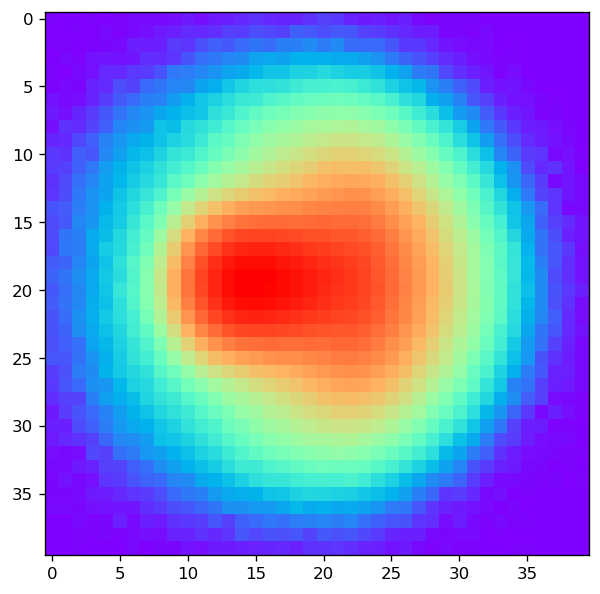

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_vap1.2Ap1Aa0.75_rdna_0.05
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


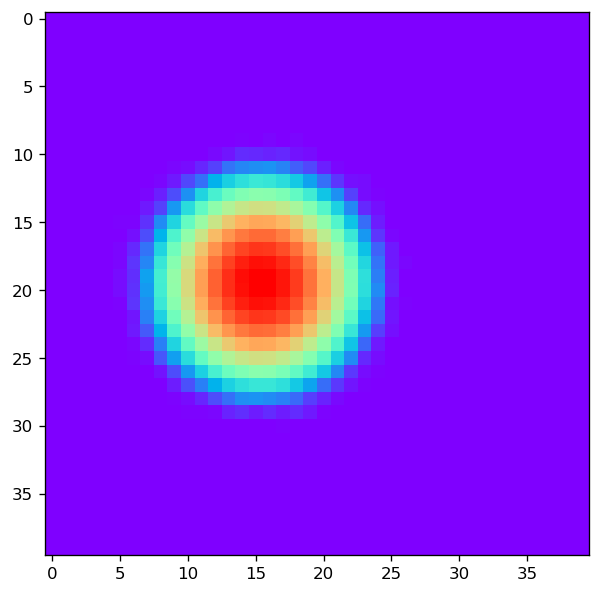

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


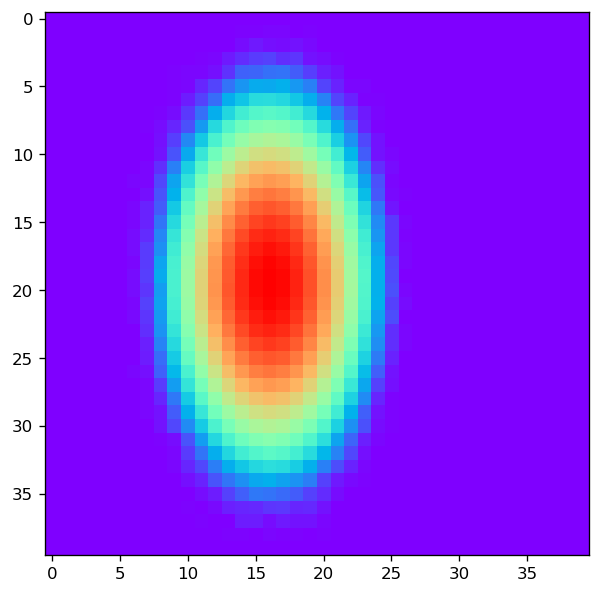

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_vap1.5Ap1.5Aa1rdna_0.007
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


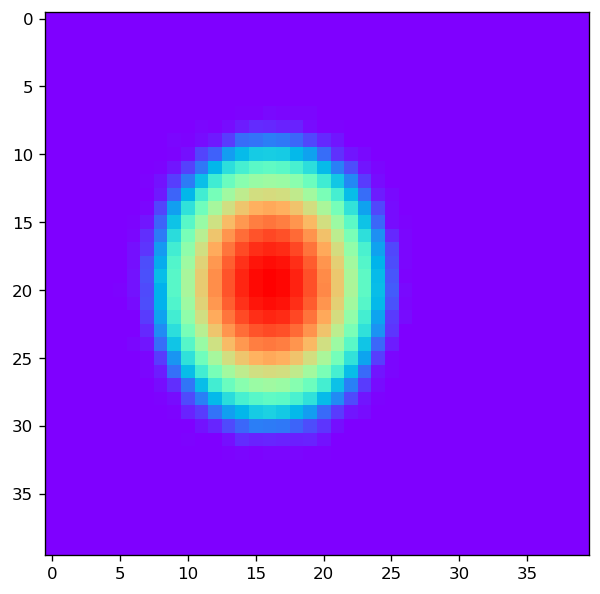

In [6]:
for simindex in range (0, len(simfiles), 1):

    simfile = simfiles[simindex]
    print("vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv")
    print("-> SIMULATION: "+simfile)
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    # Reading the simulation
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
    # Converting VDF to 40x40 array
    vdfp_4040 = np.zeros([vdfp_array.shape[0],40,40], dtype=float)
    for t in range (0, vdfp_array.shape[0], 1):
        for i in range (60,300,6):
            for j in range (40,280,6):
                vdfp_4040[t,(i-60)//6,(j-40)//6] = np.mean(vdfp_array[t,i:i+6,j:j+6])
    im, ax = plt.subplots(1, 1, figsize=(6,6), dpi=120)
    ax.imshow(np.log10(vdfp_4040[0,:,:].T+1), cmap='rainbow', interpolation='nearest')
    plt.show()

In [7]:
def prepare_mldata_vdfs(simfile):
    
    timep_array = np.load('./processing_results/' + simfile + '.timep_array.npy')
    
    # preparing VDFs
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
    vdfp_4040 = np.zeros([vdfp_array.shape[0],40,40], dtype=float)
    for t in range (0, vdfp_array.shape[0], 1):
        for i in range (60,300,6):
            for j in range (40,280,6):
                vdfp_4040[t,(i-60)//6,(j-40)//6] = np.mean(vdfp_array[t,i:i+6,j:j+6])
    vdfhe_4040 = np.zeros([vdfhe_array.shape[0],40,40], dtype=float)
    for t in range (0, vdfhe_array.shape[0], 1):
        for i in range (60,300,6):
            for j in range (40,280,6):
                vdfhe_4040[t,(i-60)//6,(j-40)//6] = np.mean(vdfhe_array[t,i:i+6,j:j+6])
    
    # writing VDFs into a single array
    featurevector_allvdfs = []
    for i in range (1, len(timep_array)-2, 1):
        subvector = []
        subvector.append(vdfp_4040[i,:,:])
        subvector.append(vdfhe_4040[i,:,:])
        featurevector_allvdfs.append(subvector)
            
    featurevector_allvdfs = np.array(featurevector_allvdfs, dtype='float')
    return featurevector_allvdfs
    

featurevector_allvdfs = prepare_mldata_vdfs(simfiles[0])
print("ML data for the simulation " + simfiles[0] + " generated")
print("Number of data points: " + str(len(featurevector_allvdfs)))
featurevector_allvdfs_all = np.copy(featurevector_allvdfs)

for i in range (1, len(simfiles), 1):
    featurevector_allvdfs = prepare_mldata_vdfs(simfiles[i])
    print("ML data for the simulation " + simfiles[i] + " generated")
    print("Number of data points: " + str(len(featurevector_allvdfs)))
    featurevector_allvdfs_all = np.concatenate((featurevector_allvdfs_all, featurevector_allvdfs))
    
np.save('./mldata_vdfs/allsimulations.mldata_vdfs_4040.npy', featurevector_allvdfs_all)

ML data for the simulation particles.d11_A0.5Hepp_beta0.5eps1e-4_256 generated
Number of data points: 78
ML data for the simulation particles.d11_A0.75Hepp_beta1_256 generated
Number of data points: 46
ML data for the simulation particles.d11_E11Ap3.3Aa2.0Vd0.42 generated
Number of data points: 46
ML data for the simulation particles.d11_E11Ap4.3Aa1.6 generated
Number of data points: 46
ML data for the simulation particles.d11_E11Ap4.3Aa1.6Vd0.32 generated
Number of data points: 46
ML data for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256 generated
Number of data points: 48
ML data for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256 generated
Number of data points: 48
ML data for the simulation particles.d11_He++A10_256_iden0eps0 generated
Number of data points: 46
ML data for the simulation particles.d11_He++v2_256_iden0eps1e-4t600 generated
Number of data points: 90
ML data for the simulation particles.d11_He++vd1.5_256_iden0eps1e-4 generated
Number of d

## Generation of a VDF converter #2

Size specification: 60x60

Range specification: -2.5$V_A$:3.5$V_A$ for x direction, -3.0$V_A$:3.0$V_A$ for y direction

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.5Hepp_beta0.5eps1e-4_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


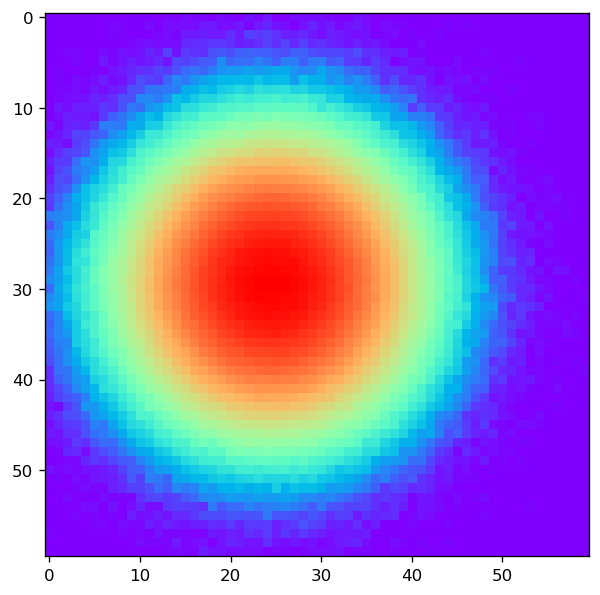

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.75Hepp_beta1_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


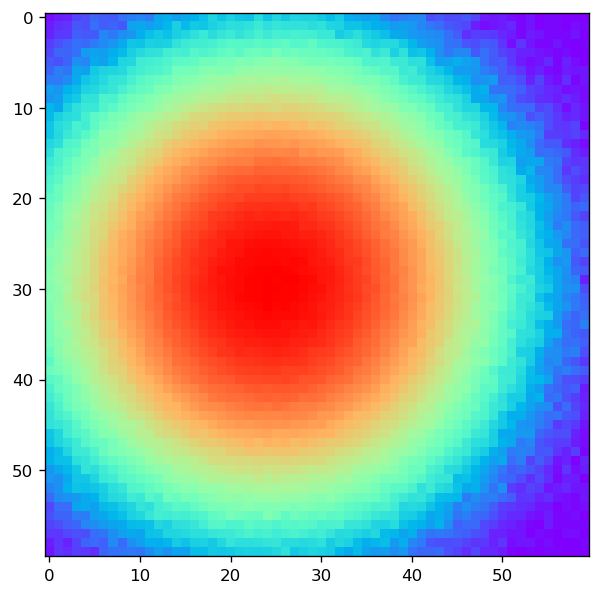

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap3.3Aa2.0Vd0.42
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


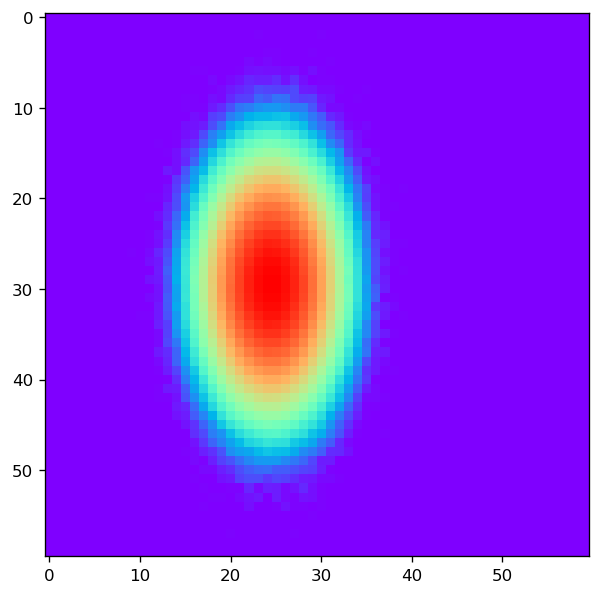

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


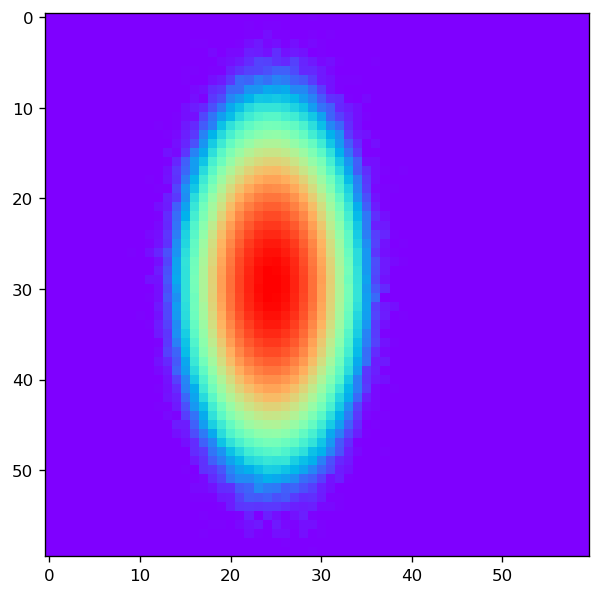

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6Vd0.32
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


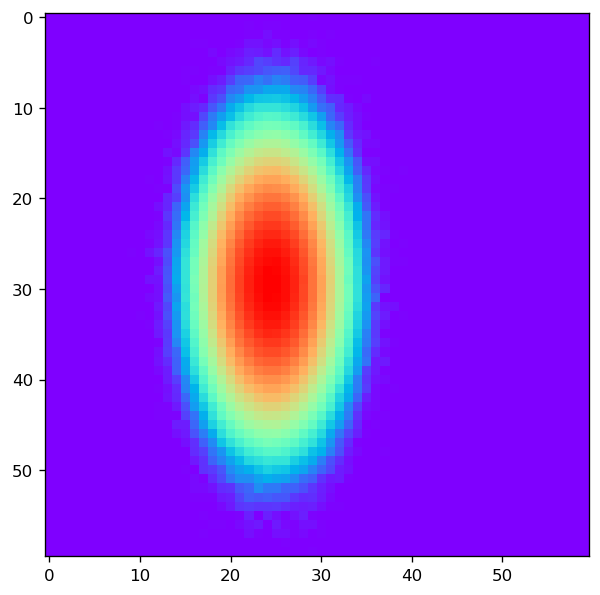

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


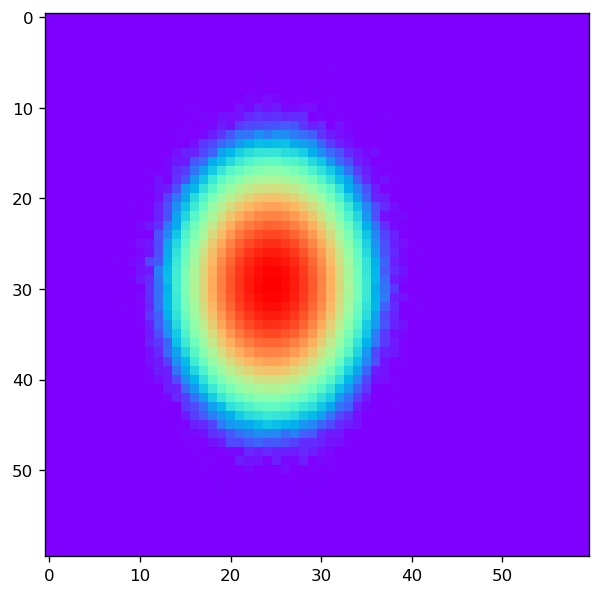

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


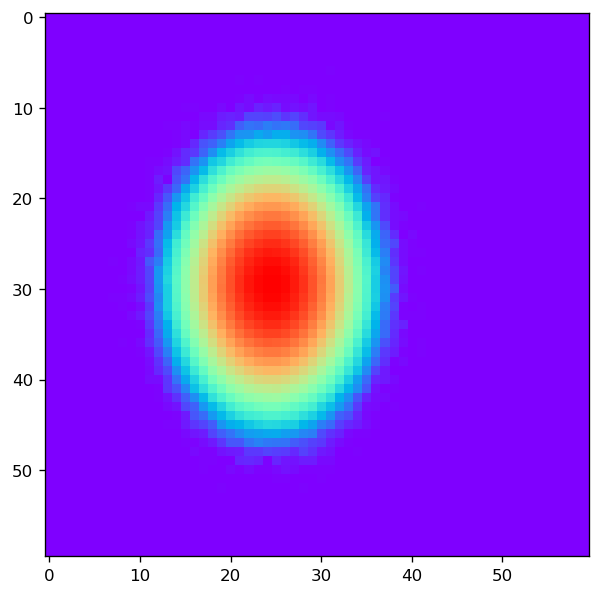

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++A10_256_iden0eps0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


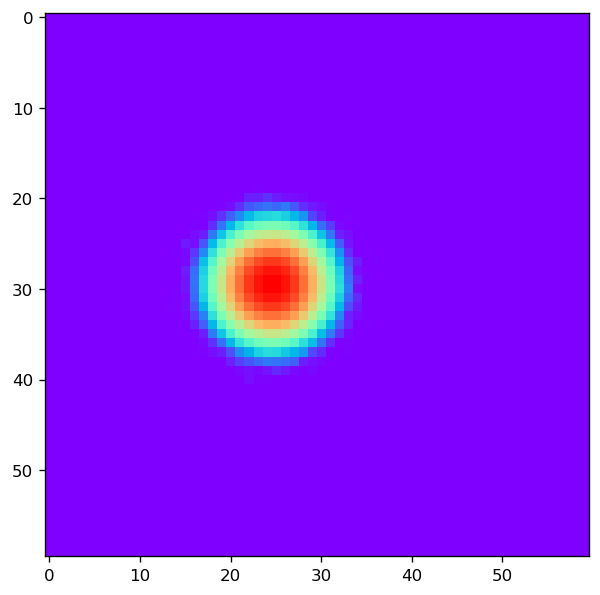

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++v2_256_iden0eps1e-4t600
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


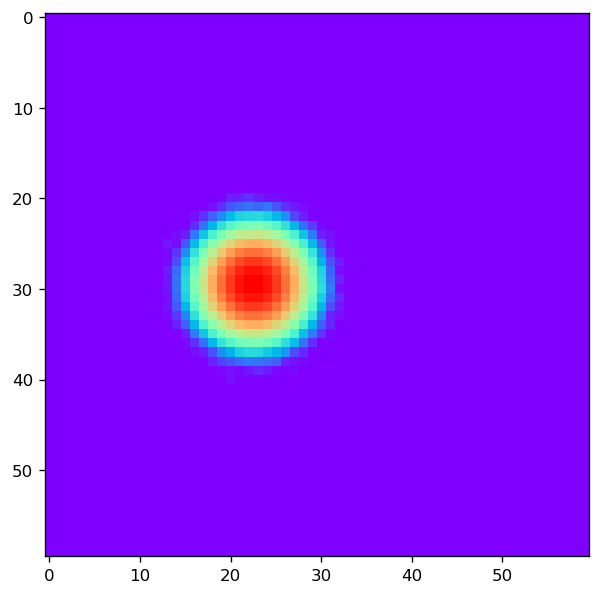

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++vd1.5_256_iden0eps1e-4
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


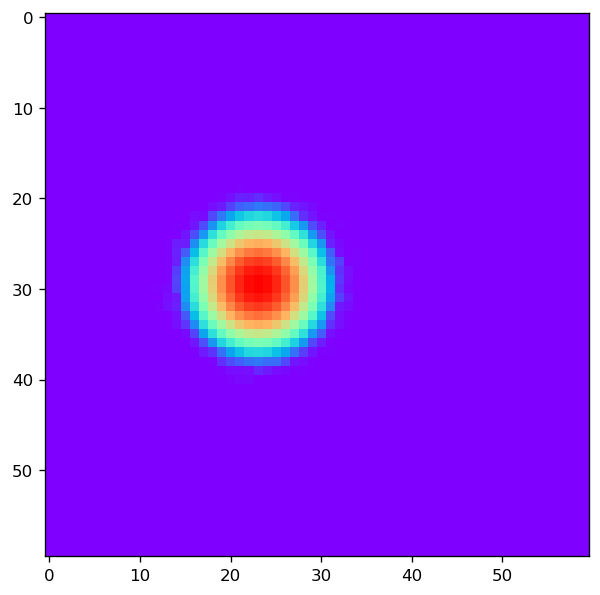

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


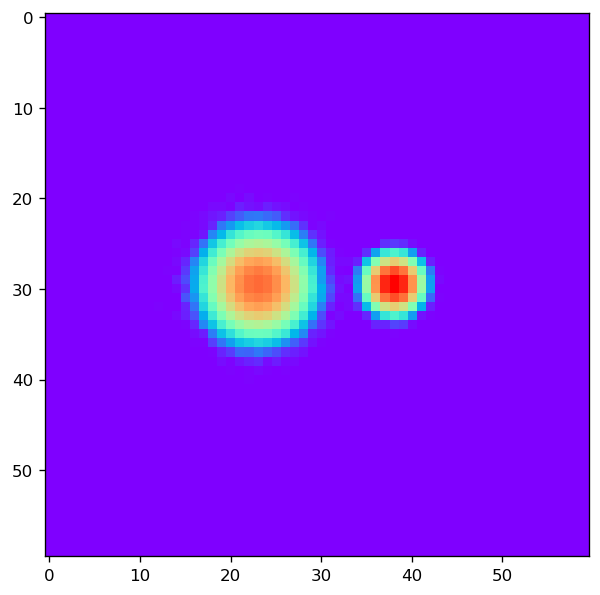

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv1Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


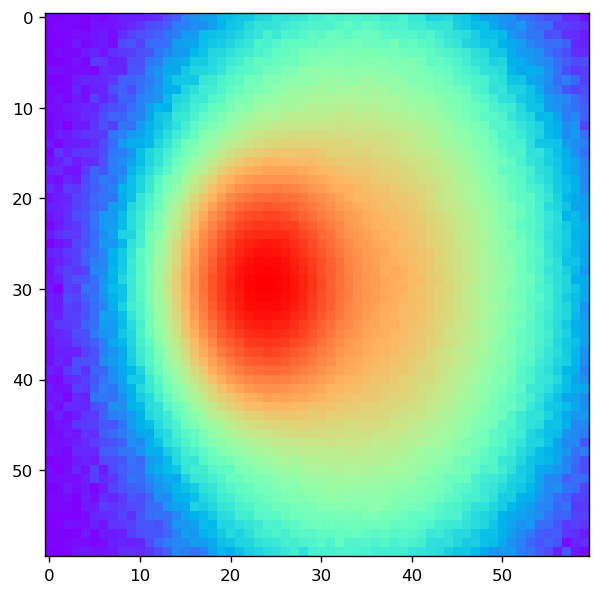

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


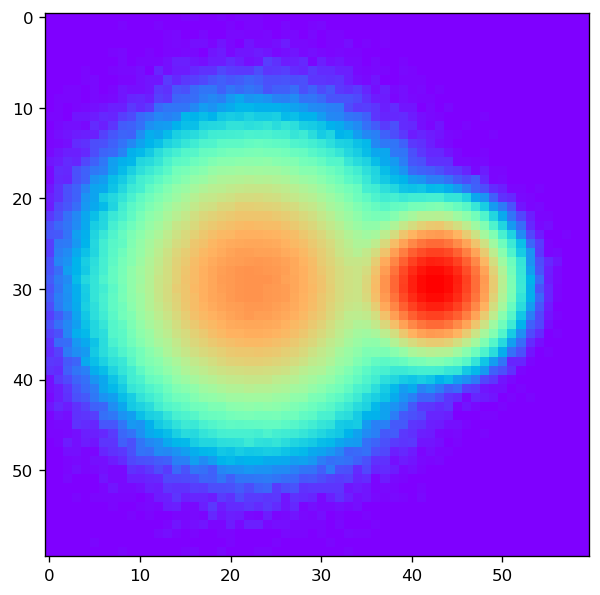

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2Ap1Ab1betac0.429betab0.858_128_128x2_dx0.75_t3000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


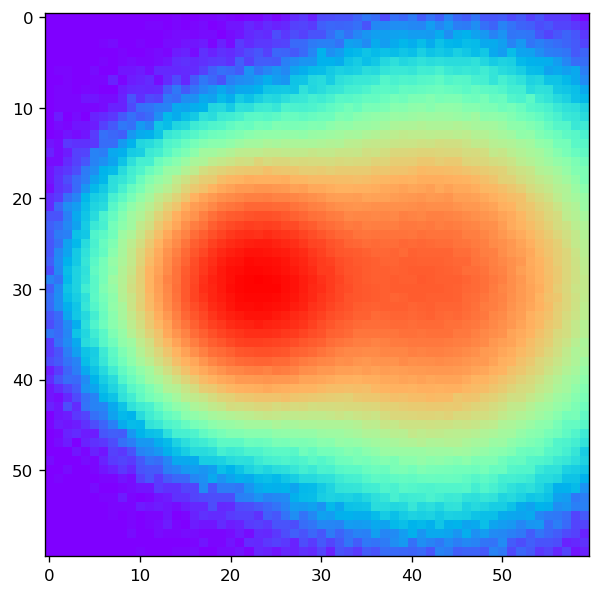

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2Ap1Ab2betac0.429betab0.858_128_128x2_dx0.75_t3000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


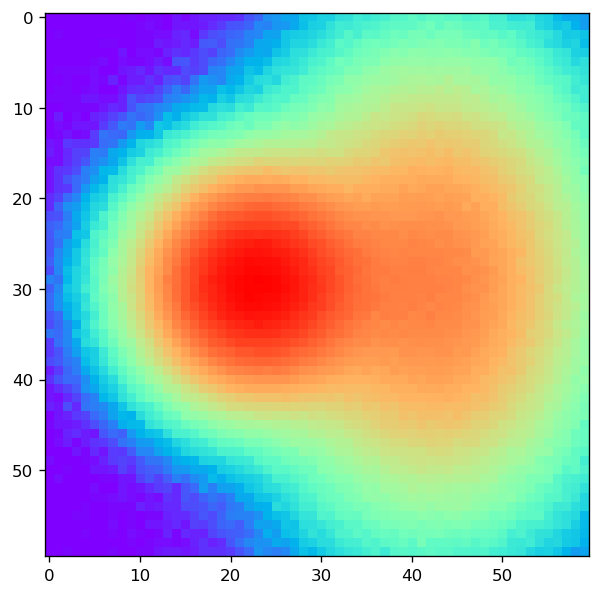

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


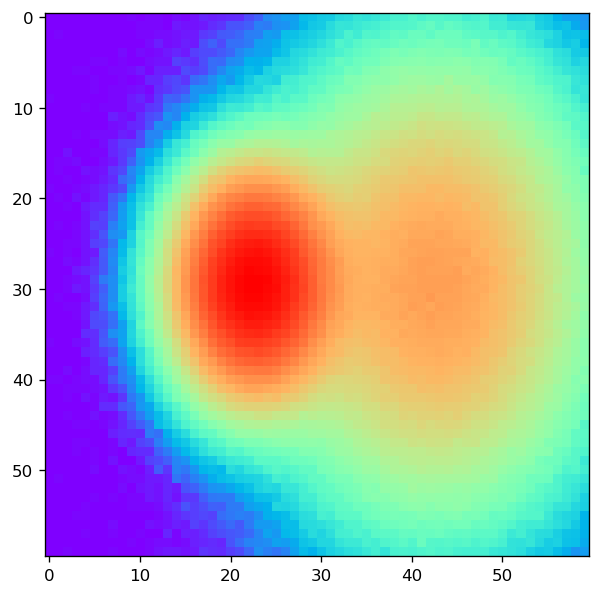

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2av2.3_128x3_iden0eps1e-4_dx0.75
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


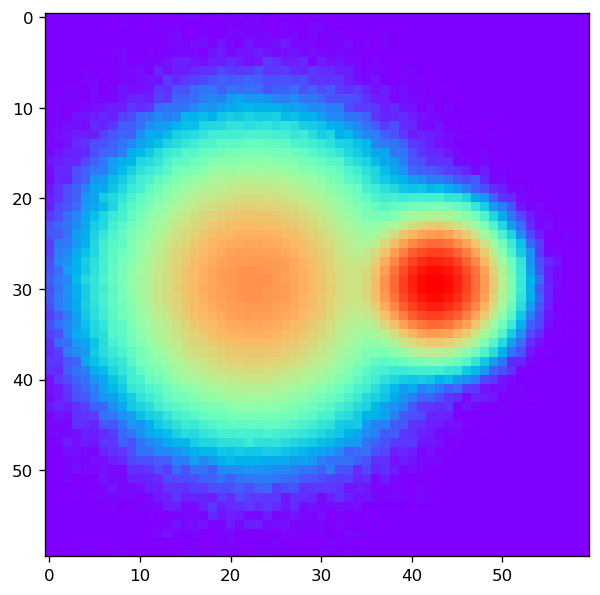

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2av2Ap1Aa1beta0.429_128_128x2_dx0.75_t3000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


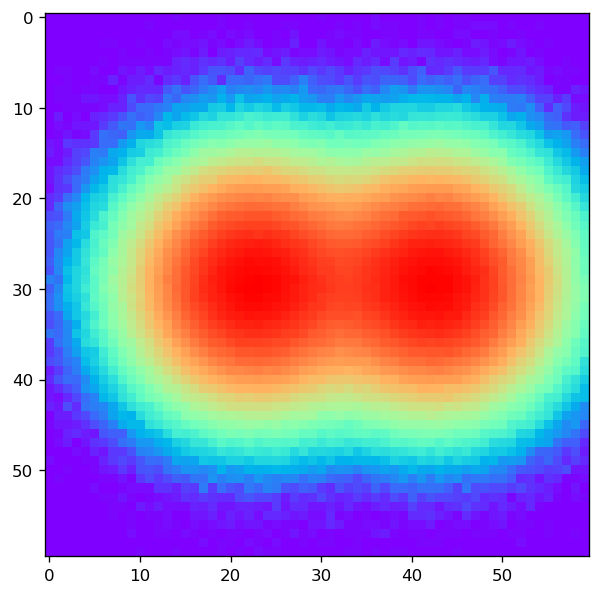

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


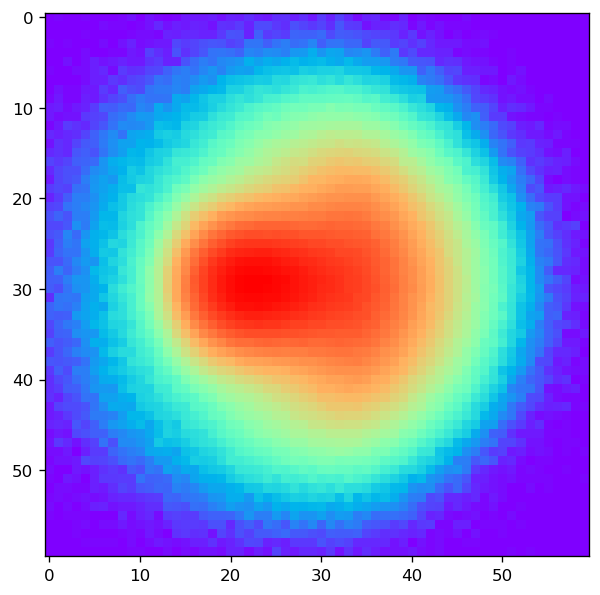

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_vap1.2Ap1Aa0.75_rdna_0.05
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


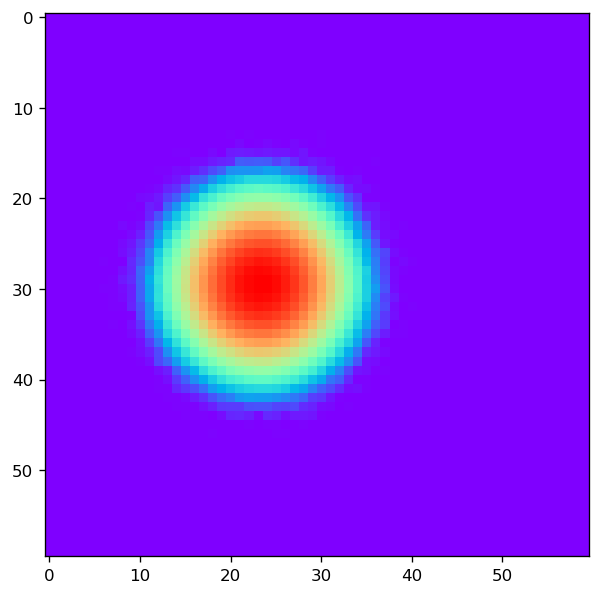

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


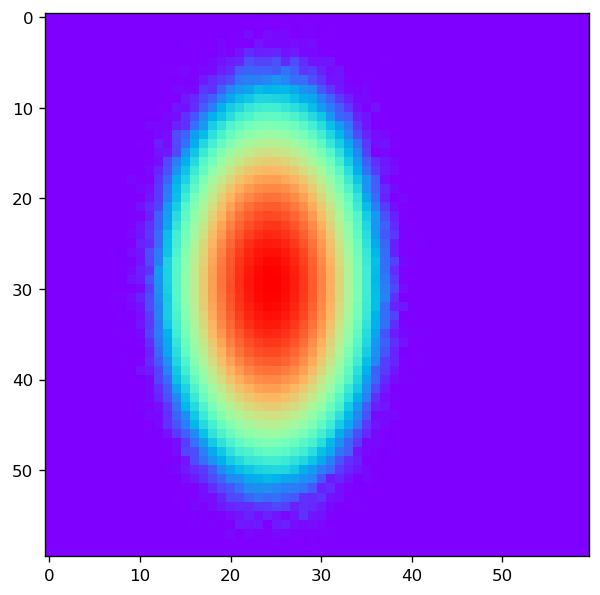

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_vap1.5Ap1.5Aa1rdna_0.007
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


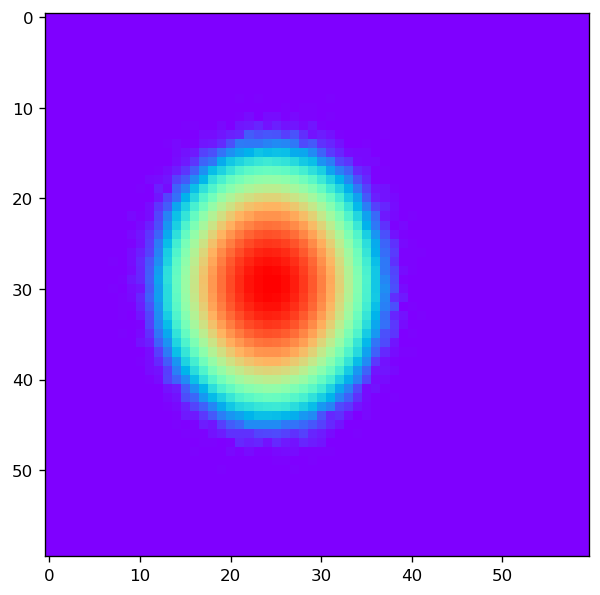

In [8]:
for simindex in range (0, len(simfiles), 1):

    simfile = simfiles[simindex]
    print("vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv")
    print("-> SIMULATION: "+simfile)
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    # Reading the simulation
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
    # Converting VDF to 40x40 array
    vdfp_6060 = np.zeros([vdfp_array.shape[0],60,60], dtype=float)
    for t in range (0, vdfp_array.shape[0], 1):
        for i in range (60,300,4):
            for j in range (40,280,4):
                vdfp_6060[t,(i-60)//4,(j-40)//4] = np.mean(vdfp_array[t,i:i+4,j:j+4])
    im, ax = plt.subplots(1, 1, figsize=(6,6), dpi=120)
    ax.imshow(np.log10(vdfp_6060[0,:,:].T+1), cmap='rainbow', interpolation='nearest')
    plt.show()

In [9]:
def prepare_mldata_vdfs(simfile):
    
    timep_array = np.load('./processing_results/' + simfile + '.timep_array.npy')
    
    # preparing VDFs
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
    vdfp_6060 = np.zeros([vdfp_array.shape[0],60,60], dtype=float)
    for t in range (0, vdfp_array.shape[0], 1):
        for i in range (60,300,4):
            for j in range (40,280,4):
                vdfp_6060[t,(i-60)//4,(j-40)//4] = np.mean(vdfp_array[t,i:i+4,j:j+4])
    vdfhe_6060 = np.zeros([vdfhe_array.shape[0],60,60], dtype=float)
    for t in range (0, vdfhe_array.shape[0], 1):
        for i in range (60,300,4):
            for j in range (40,280,4):
                vdfhe_6060[t,(i-60)//4,(j-40)//4] = np.mean(vdfhe_array[t,i:i+4,j:j+4])
    
    # writing VDFs into a single array
    featurevector_allvdfs = []
    for i in range (1, len(timep_array)-2, 1):
        subvector = []
        subvector.append(vdfp_6060[i,:,:])
        subvector.append(vdfhe_6060[i,:,:])
        featurevector_allvdfs.append(subvector)
            
    featurevector_allvdfs = np.array(featurevector_allvdfs, dtype='float')
    return featurevector_allvdfs
    

featurevector_allvdfs = prepare_mldata_vdfs(simfiles[0])
print("ML data for the simulation " + simfiles[0] + " generated")
print("Number of data points: " + str(len(featurevector_allvdfs)))
featurevector_allvdfs_all = np.copy(featurevector_allvdfs)

for i in range (1, len(simfiles), 1):
    featurevector_allvdfs = prepare_mldata_vdfs(simfiles[i])
    print("ML data for the simulation " + simfiles[i] + " generated")
    print("Number of data points: " + str(len(featurevector_allvdfs)))
    featurevector_allvdfs_all = np.concatenate((featurevector_allvdfs_all, featurevector_allvdfs))
    
np.save('./mldata_vdfs/allsimulations.mldata_vdfs_6060.npy', featurevector_allvdfs_all)

ML data for the simulation particles.d11_A0.5Hepp_beta0.5eps1e-4_256 generated
Number of data points: 78
ML data for the simulation particles.d11_A0.75Hepp_beta1_256 generated
Number of data points: 46
ML data for the simulation particles.d11_E11Ap3.3Aa2.0Vd0.42 generated
Number of data points: 46
ML data for the simulation particles.d11_E11Ap4.3Aa1.6 generated
Number of data points: 46
ML data for the simulation particles.d11_E11Ap4.3Aa1.6Vd0.32 generated
Number of data points: 46
ML data for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256 generated
Number of data points: 48
ML data for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256 generated
Number of data points: 48
ML data for the simulation particles.d11_He++A10_256_iden0eps0 generated
Number of data points: 46
ML data for the simulation particles.d11_He++v2_256_iden0eps1e-4t600 generated
Number of data points: 90
ML data for the simulation particles.d11_He++vd1.5_256_iden0eps1e-4 generated
Number of d

## Validation of array sizes

In [10]:
featurevector_allvdfs_all_6060 = np.load('./mldata_vdfs/allsimulations.mldata_vdfs_6060.npy')
featurevector_allvdfs_all_4040 = np.load('./mldata_vdfs/allsimulations.mldata_vdfs_4040.npy')
labels_sample = np.load('./mldata_vdfmoments/allsimulations.labels_allmoments_an_01_all.npy')

print(featurevector_allvdfs_all_6060.shape)
print(featurevector_allvdfs_all_4040.shape)
print(labels_sample.shape)

(1253, 2, 60, 60)
(1253, 2, 40, 40)
(1253,)
